In [1]:
# import kagglehub

# path = kagglehub.dataset_download("mdwaquarazam/agricultural-crops-image-classification")

# print("Path to dataset files:", path)

In [2]:
path = "C:/Users/Yakina/.cache/kagglehub/datasets/mdwaquarazam/agricultural-crops-image-classification/versions/1/Agricultural-crops"

In [3]:
import os
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

In [4]:
import tensorflow as tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal 

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

initializer = HeNormal()

In [5]:
subfolders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

Crop: almond


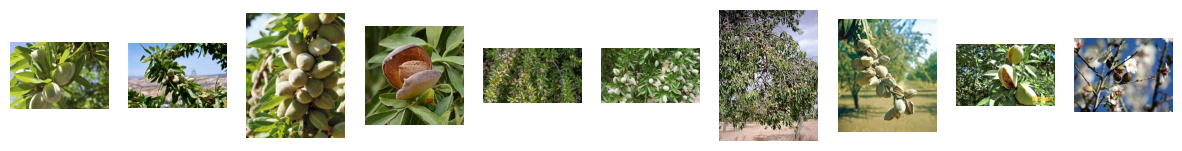

Crop: banana


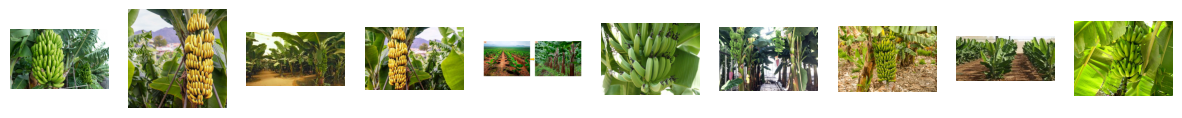

Crop: cardamom


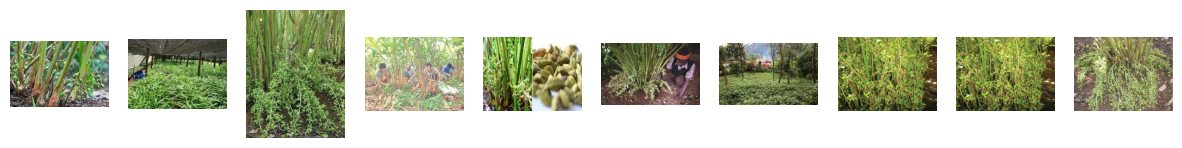

Crop: Cherry


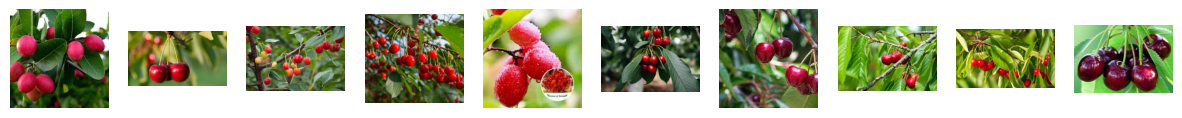

Crop: chilli


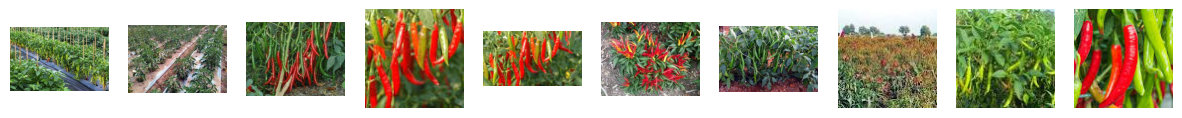

Crop: clove


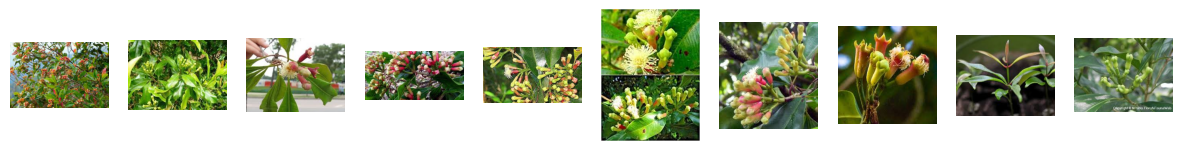

Crop: coconut


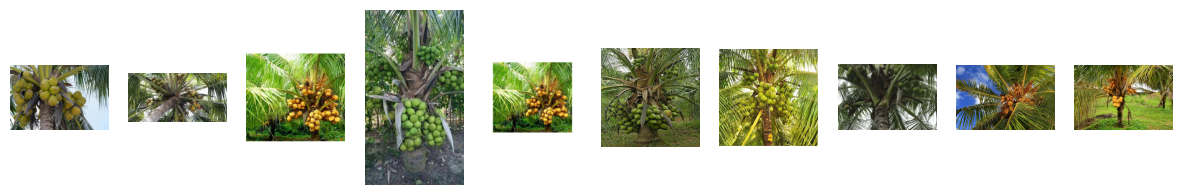

Crop: Coffee-plant


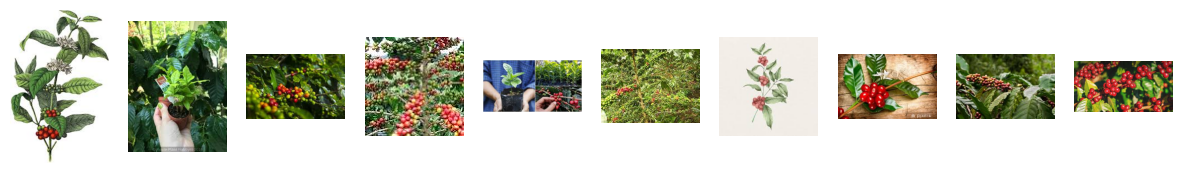

Crop: cotton


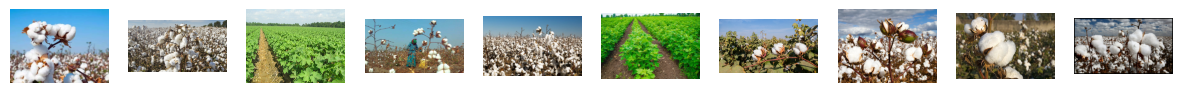

Crop: Cucumber


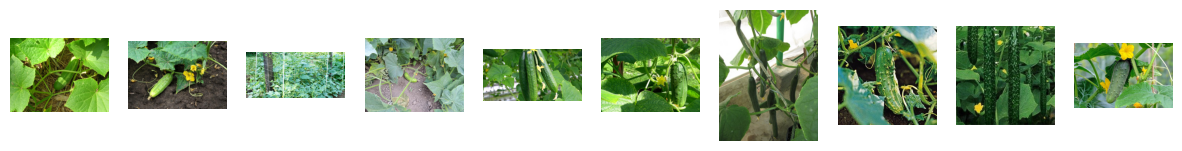

Crop: Fox_nut(Makhana)


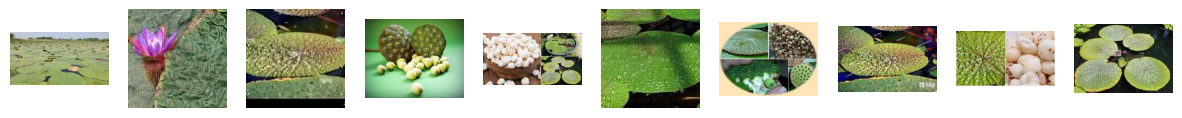

Crop: gram


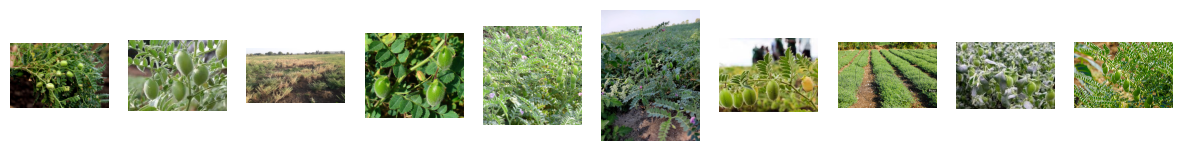

Crop: jowar


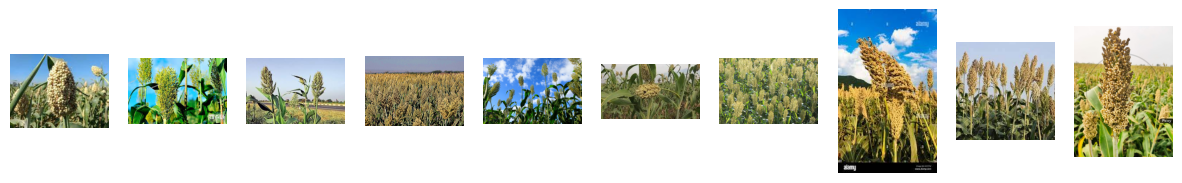

Crop: jute


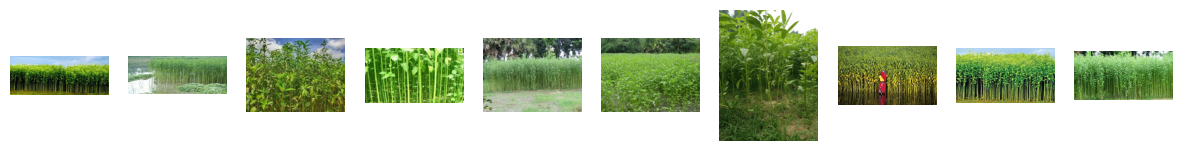

Crop: Lemon


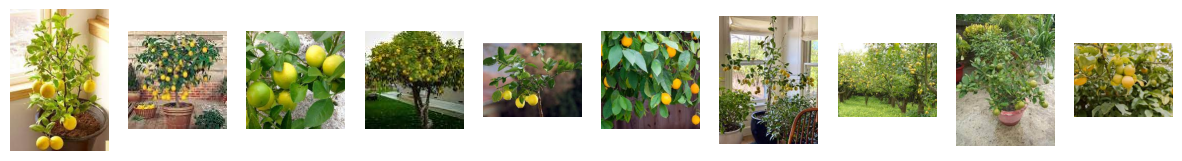

Crop: maize


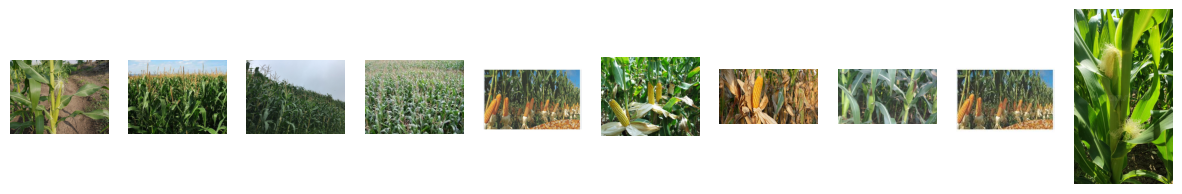

Crop: mustard-oil


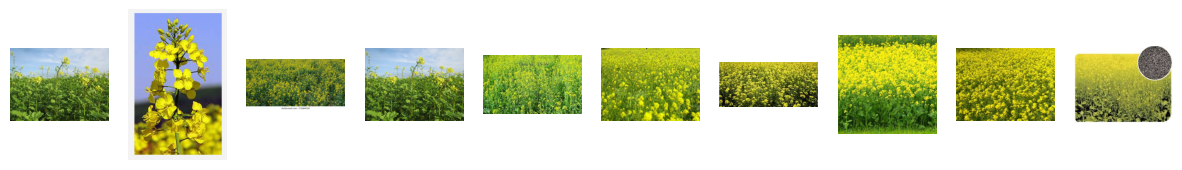

Crop: Olive-tree


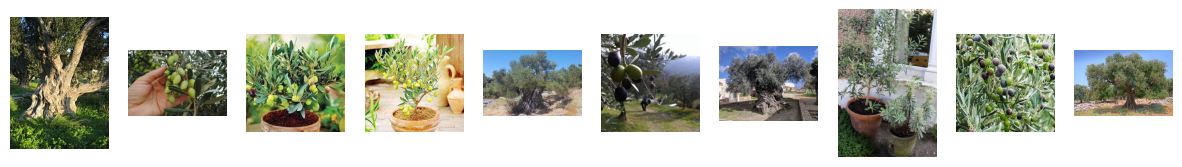

Crop: papaya


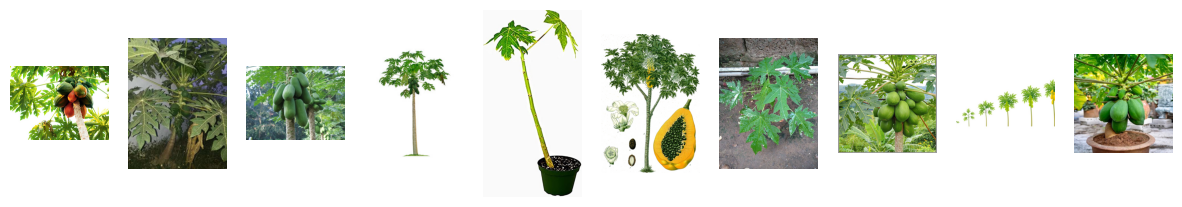

Crop: Pearl_millet(bajra)


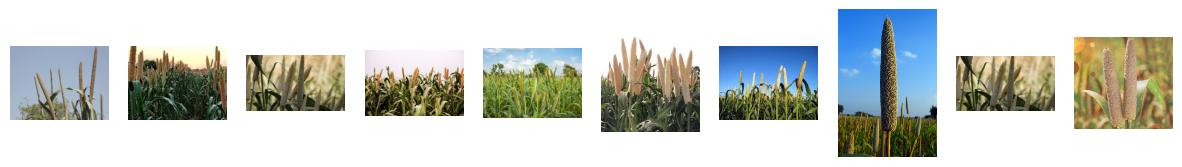

Crop: pineapple


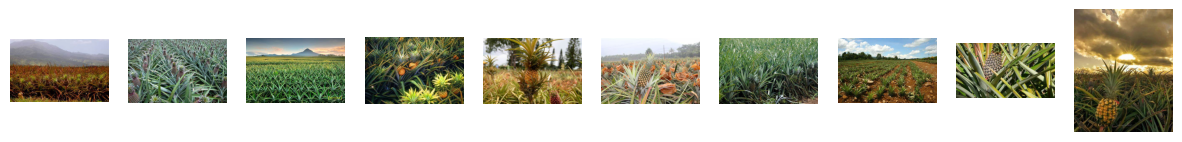

Crop: rice


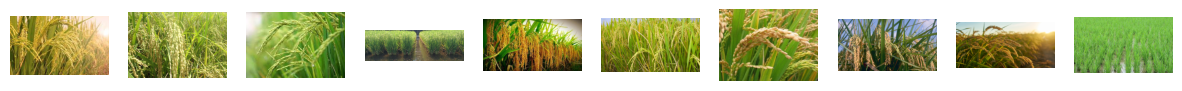

Crop: soyabean


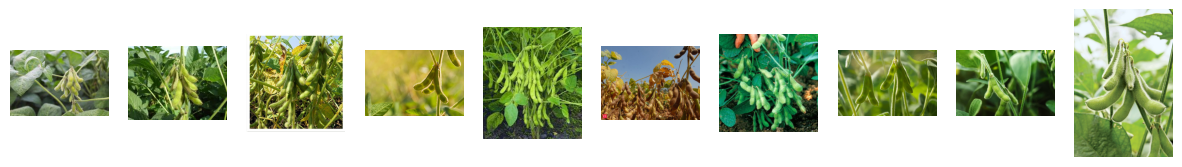

Crop: sugarcane


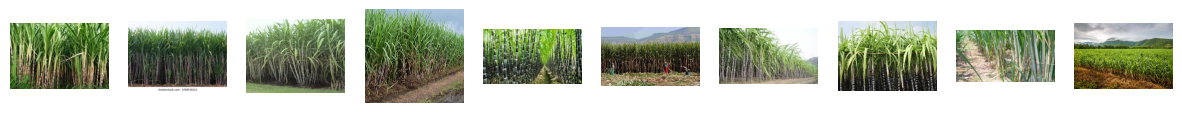

Crop: sunflower


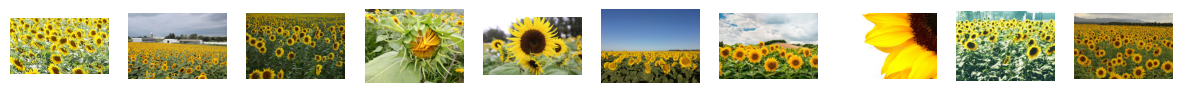

Crop: tea


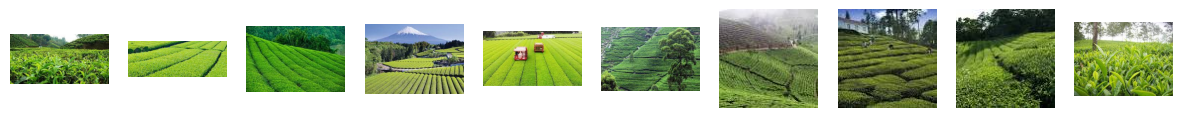

Crop: Tobacco-plant


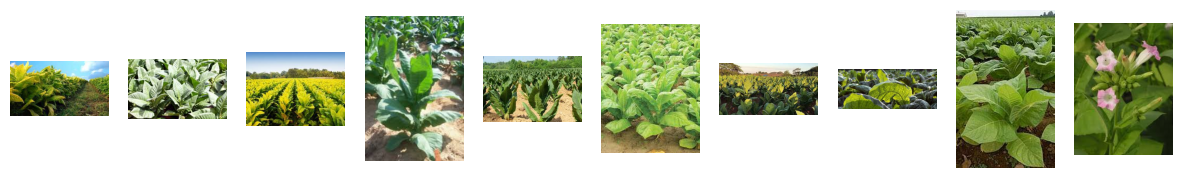

Crop: tomato


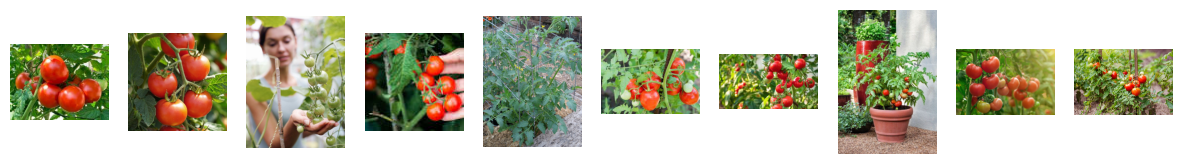

Crop: vigna-radiati(Mung)


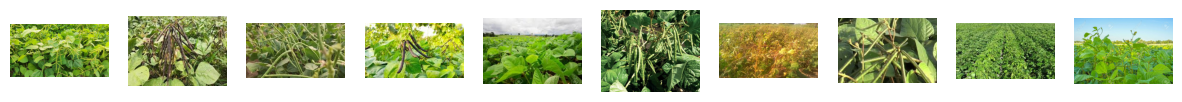

Crop: wheat


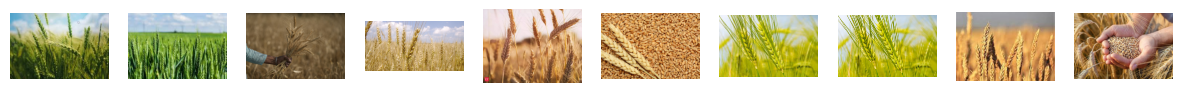

In [6]:
num_images_per_crop = 10

for subfolder in subfolders:
    crop_dir = os.path.join(path, subfolder)
    image_files = [os.path.join(crop_dir, filename) for filename in os.listdir(crop_dir) if os.path.isfile(os.path.join(crop_dir, filename))]

    if len(image_files) >= num_images_per_crop:
        random_images = random.sample(image_files, num_images_per_crop)

        print(f"Crop: {subfolder}")

        plt.figure(figsize=(15, 5))

        for i, image_path in enumerate(random_images):
            plt.subplot(1, num_images_per_crop, i + 1)
            
            # img = mpimg.imread(image_path)
            img = Image.open(image_path)

            plt.imshow(img)
            plt.axis('off')

        plt.show()

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 829 images belonging to 30 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer, input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu', kernel_initializer=initializer, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(30, activation='softmax')
])

c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
num_epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    verbose=1
)

c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.0870 - loss: 14.5449
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2015 - loss: 12.2707
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1931 - loss: 10.1632
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2584 - loss: 9.0691
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3019 - loss: 7.6149
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3150 - loss: 7.0583
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3669 - loss: 6.5750
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.3538 - loss: 6.5268
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3953 - loss: 6.4755
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3680 - loss: 6.1018
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4058 - loss: 6.2421
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accura

In [1]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=len(train_generator))

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

NameError: name 'model' is not defined